In [22]:
import numpy as np
from typing import Union
import matplotlib.pyplot as plt
import math

In [91]:
#From Stack overflow, 
#https://stackoverflow.com/questions/53489237/how-can-you-implement-householder-based-qr-decomposition-in-python
def householder_vectorized(a):
    """Use this version of householder to reproduce the output of np.linalg.qr 
    exactly (specifically, to match the sign convention it uses)
    
    based on https://rosettacode.org/wiki/QR_decomposition#Python
    """
    v = a / (a[0] + np.copysign(np.linalg.norm(a), a[0]))
    v[0] = 1
    tau = 2 / np.linalg.norm(v, ord = 2)
    
    return v,tau

def qr_decomposition(A: np.ndarray) -> Union[np.ndarray, np.ndarray]:
    m,n = A.shape
    R = A.copy()
    Q = np.identity(m)
    
    for j in range(0, n):
        # Apply Householder transformation.
        v, tau = householder_vectorized(R[j:, j, np.newaxis])
        
        H = np.identity(m)
        H[j:, j:] -= tau * (v @ v.T)
        R = H @ R
        Q = H @ Q

    return Q[:n].T, np.triu(R[:n])

In [67]:
def calculate_householder_temp(v, j, m):
    """Use this version of householder to reproduce the output of np.linalg.qr 
    exactly (specifically, to match the sign convention it uses)
    
    based on https://rosettacode.org/wiki/QR_decomposition#Python
    """
    u = v / (v[0] + np.copysign(np.linalg.norm(v), v[0]))
    u[0] = 1
    
    H = np.identity(m)
    H[j:, j:] -= (2/np.linalg.norm(u, ord=2)) * np.outer(u, u)
    
    return H

def qr_decomposition_temp(A: np.ndarray) -> Union[np.ndarray, np.ndarray]:
    m, n = A.shape
    R = A.copy()
    Q = np.identity(m)
    
    for j in range(0, n):
        # Apply Householder transformation.
        Hit = calculate_householder_temp(R[j:, j, np.newaxis], j, m)

        # Update the submatrix R[j:, :]
        R[j:, :] = np.matmul(Hit, R[j:, :])

        # Update Q
        Q = np.matmul(Hit, Q)

    return Q[:n].T, np.triu(R[:n])

In [102]:
A = np.array([[12, -51, 4, 12],
                [6, 167, -68, 43],
                [-4, 24, -41, 85],
                [1, 0.1, -6, 451]])
HH = hausholder_qr(A)
R_HH = np.triu(HH)
R_HH = np.array([x for x in R_HH if x.any() != 0])
Q_HH = calculate_Q(HH)
Q, R = qr_decomposition(A)
Q_C, R_C = np.linalg.qr(A)

In [103]:
abs(Q_C - Q) < 0.001

array([[False, False, False, False],
       [False,  True, False, False],
       [False, False, False, False],
       [False,  True,  True, False]])

In [104]:
abs(R_C - R) < 0.01

array([[False, False, False, False],
       [ True, False, False, False],
       [ True,  True, False, False],
       [ True,  True,  True, False]])

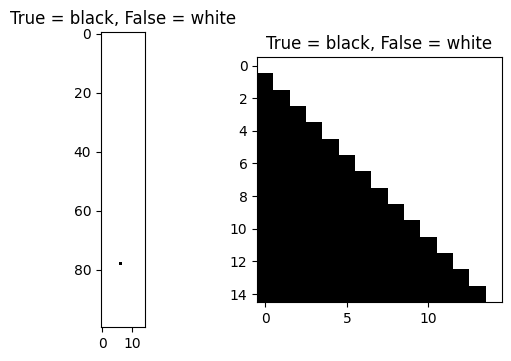

In [105]:
Q_C, R_C = np.linalg.qr(Van)
Q, R = qr_decomposition(Van)

plt_arr1 = abs(Q_C - Q) < 0.0001
plt_arr2 = abs(R_C - R) < 0.0001


plt.subplot(1, 2, 1)
plt.imshow(plt_arr1, cmap='Greys',  interpolation='nearest')
plt.title("True = black, False = white")
plt.subplot(1, 2, 2)
plt.imshow(plt_arr2, cmap='Greys',  interpolation='nearest')
plt.title("True = black, False = white")

plt.tight_layout(pad = 5)

In [108]:
HH = hausholder_qr(A)
R_HH = np.triu(HH)
R_HH = np.array([x for x in R_HH if x.any() != 0])
Q_HH = calculate_Q(HH)


n= 15
c = np.matmul(Q_HH[:, :n].T, b)
d = np.matmul(Q_HH[:, n:].T, b) #Don't think I need to actually compute this

#Solution to part i 
x_soli = back_substitution(R_HH, c)
x_soli[-1]

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 100 is different from 4)

In [49]:
print(Q_C) 
print(Q)

[[-0.85714286  0.39428571  0.33142857]
 [-0.42857143 -0.90285714 -0.03428571]
 [ 0.28571429 -0.17142857  0.94285714]]
[[-0.85714286  0.39428571 -0.33142857]
 [-0.42857143 -0.90285714  0.03428571]
 [ 0.28571429 -0.17142857 -0.94285714]]


In [99]:
def get_Van_b():
    """
    Gets the Vandermonde matrix and b we are considering.
    
    """
    n = 15
    m = 100

    alphas = np.array([i/(m - 1) for i in range(m)])
    
    Van = np.ndarray((m, n))
    for i in range(m):
        for j in range(n):
            Van[i, j] = alphas[i]**j
    b = np.zeros(m)
    for i in range(m):
        b[i] = math.exp(math.sin(4 * alphas[i]))
        
    return Van, b

Van, b = get_Van_b()

In [ ]:
def householder_vectorized(a):
    """Use this version of householder to reproduce the output of np.linalg.qr 
    exactly (specifically, to match the sign convention it uses)
    
    based on https://rosettacode.org/wiki/QR_decomposition#Python
    """
    v = a / (a[0] + np.copysign(np.linalg.norm(a), a[0]))
    v[0] = 1
    tau = 2 / (v.T @ v)
    
    return v,tau

In [25]:
def back_substitution(A: np.ndarray, b: np.ndarray) -> np.ndarray:
    n = b.size
    x = np.zeros_like(b)

    if A[n-1, n-1] == 0:
        raise ValueError


    x[n-1] = b[n-1]/A[n-1, n-1]
    C = np.zeros((n,n))
    for i in range(n-2, -1, -1):
        bb = 0
        for j in range (i+1, n):
            bb += A[i, j]*x[j]

        C[i, i] = b[i] - bb
        x[i] = C[i, i]/A[i, i]

    return x

In [107]:
def calculate_Hausholder(v: np.array):
    """
    Helper function to calculate the Hausholder matrix from v.
    
    Parameters
    ----------
    v : np.array
        The given vector. Needs to be normalized prior to passing.
        
    Returns
    -------
    H : np.ndarray
        The Hausholder matrix of v.
    """
    H = np.identity(max(v.shape)) - (2/np.linalg.norm(v, ord = 2))*np.outer(v, v)
    return H


def hausholder_qr(A: np.ndarray):
    """
        Returns the QR factorization obtained through 
        the Hausholder Reflection method. 
        
        Elements belonging to and above diagonal are R, 
        
        Below the diagonal are the column vectors v_1, ..., v_n-1
        which are used to get Q_1, ..., Q_n-1. 
        
    """
    m, n = A.shape
    v_mat = []
    Q = np.identity(m)
    for i in range(n-1):
        
        # Obtaining v_i
        u = A[i:, i].copy()
        v = u / (u[0] + np.copysign(np.linalg.norm(u), u[0]))
        v[0] = 1
        
        
        v_mat.append(v.copy())

        #Calculating Q only to get next iteration
        Q = np.identity(m)
        Q[i:, i:] = calculate_Hausholder(v)
        
        A = np.matmul(Q, A)
    
    A = np.vstack((A, np.zeros(A.shape[1])))
    #Storing v_i's
    for i in range(n-1):
        A[i+1:, i] = np.array(v_mat[i])
        
    return A

def recover_Qis(A: np.ndarray):
    """
    Calculates all Q_is from a Hausholder applied matrix A.
    
    Parameters
    ----------
    
    A : np.ndarray
        The matrix on which Hausholder QR has been performed
        
    Returns
    -------
    Qis : list(np.ndarray)
        A list containing all Q's 
    """
    Qis = []
    
    m, n = A.shape
    
    for i in range(n - 1):
        #v = np.zeros(m - i)
        v = A[i+1:, i].copy()
        #v[:-1] = A[i+1:, i].copy()
        #v[-1] = np.sqrt(1 - np.linalg.norm(v, ord = 2)**2)
        Q = np.identity(m-1)
        Q[i:, i:] = calculate_Hausholder(v)
        Qis.append(Q)
    
    return Qis

def calculate_Q(A: np.ndarray):
    """
    Returns the orthonormal matrix Q from the matrix A after Hausholder QR 
    is applied.
    
    Parameters
    ----------
    
    A : np.ndarray
        The matrix on which Hausholder QR has been performed

    Returns
    -------    
    
    Q: np.ndarray
        The orthonormal matrix involved in QR
    """
    
    Qis = recover_Qis(A.copy())
    Q = np.identity(Qis[0].shape[0])
    for Qi in Qis:
        Q = np.matmul(Q, Qi.T)
        
    return Q